In [255]:
#This notebook contains over 10 different types visualistions based on the Kaggle Health and Lifestyle Insights dataset
#Visualization types include: Hex bin,Pie Chart.Heatmap,Box plot,Dot ploit,
#line chart,Scatter plot,Stacked bar,Histogram,Grouped Bar Chart,Bar chart and Simple plot

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [259]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset-checkpoint.csv")

In [261]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [263]:
# Summary statistics for Age
age_summary = df['Age'].describe()

# Summary statistics for Sleep Duration
sleep_duration_summary = df['Sleep Duration'].describe()

# Summary statistics for Physical Activity (assumed to be in 'Daily Steps')
physical_activity_summary = df['Daily Steps'].describe()

# Summary statistics for Stress Levels
stress_summary = df['Stress Level'].describe()

# Count occurrences of each BMI Category
bmi_category_counts = df['BMI Category'].value_counts().reset_index()
bmi_category_counts.columns = ['BMI Category', 'Count']

# Create a summary DataFrame
summary = pd.DataFrame({
    'Metric': ['Age', 'Sleep Duration', 'Physical Activity', 'Stress Level', 'BMI Category'],
    'Mean': [age_summary['mean'], sleep_duration_summary['mean'], physical_activity_summary['mean'],
             stress_summary['mean'], None],  # Mean is not applicable for categorical
    'Min': [age_summary['min'], sleep_duration_summary['min'], physical_activity_summary['min'],
            stress_summary['min'], None],  # Min is not applicable for categorical
    'Max': [age_summary['max'], sleep_duration_summary['max'], physical_activity_summary['max'],
            stress_summary['max'], None],  # Max is not applicable for categorical
})

# Create a DataFrame for BMI Category counts
bmi_category_summary = pd.DataFrame({
    'Metric': bmi_category_counts['BMI Category'],
    'Mean': bmi_category_counts['Count'],
    'Min': None,
    'Max': None
})

# Concatenate the BMI category summary to the main summary
final_summary = pd.concat([summary, bmi_category_summary], ignore_index=True)

print(final_summary)

              Metric         Mean     Min      Max
0                Age    42.184492    27.0     59.0
1     Sleep Duration     7.132086     5.8      8.5
2  Physical Activity  6816.844920  3000.0  10000.0
3       Stress Level     5.385027     3.0      8.0
4       BMI Category          NaN     NaN      NaN
5             Normal   195.000000     NaN      NaN
6         Overweight   148.000000     NaN      NaN
7      Normal Weight    21.000000     NaN      NaN
8              Obese    10.000000     NaN      NaN


C:\Users\mmando_Adm\AppData\Local\Temp\ipykernel_29240\1683914817.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_summary = pd.concat([summary, bmi_category_summary], ignore_index=True)


In [266]:
# 1. Age Distribution

age_counts = df['Age'].value_counts().sort_index()  #Count occurrences of each age

# Create a DataFrame for ages and their counts
age_df = pd.DataFrame({'Age': age_counts.index, 'Count': age_counts.values})
age_df.head()



,Age,Count
0,27,1
1,28,5
2,29,13
3,30,13
4,31,18


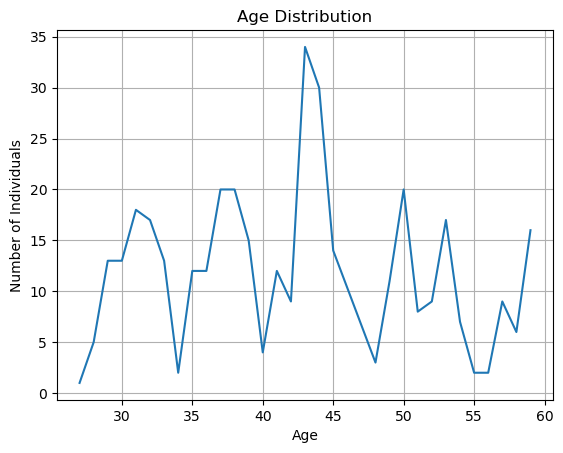

In [268]:
#Age Distribution using Simple Plot
fig, ax = plt.subplots()
ax.plot(age_df['Age'], age_df['Count'])
ax.set(xlabel='Age', ylabel='Number of Individuals',
       title='Age Distribution')
ax.grid()
plt.show()

In [270]:
# 1. Genter Distribution

gender_counts = df['Gender'].value_counts().sort_index()  #Count occurrences of each age

# Create a DataFrame for ages and their counts
gender_df = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values})
gender_df.head()


,Gender,Count
0,Female,185
1,Male,189


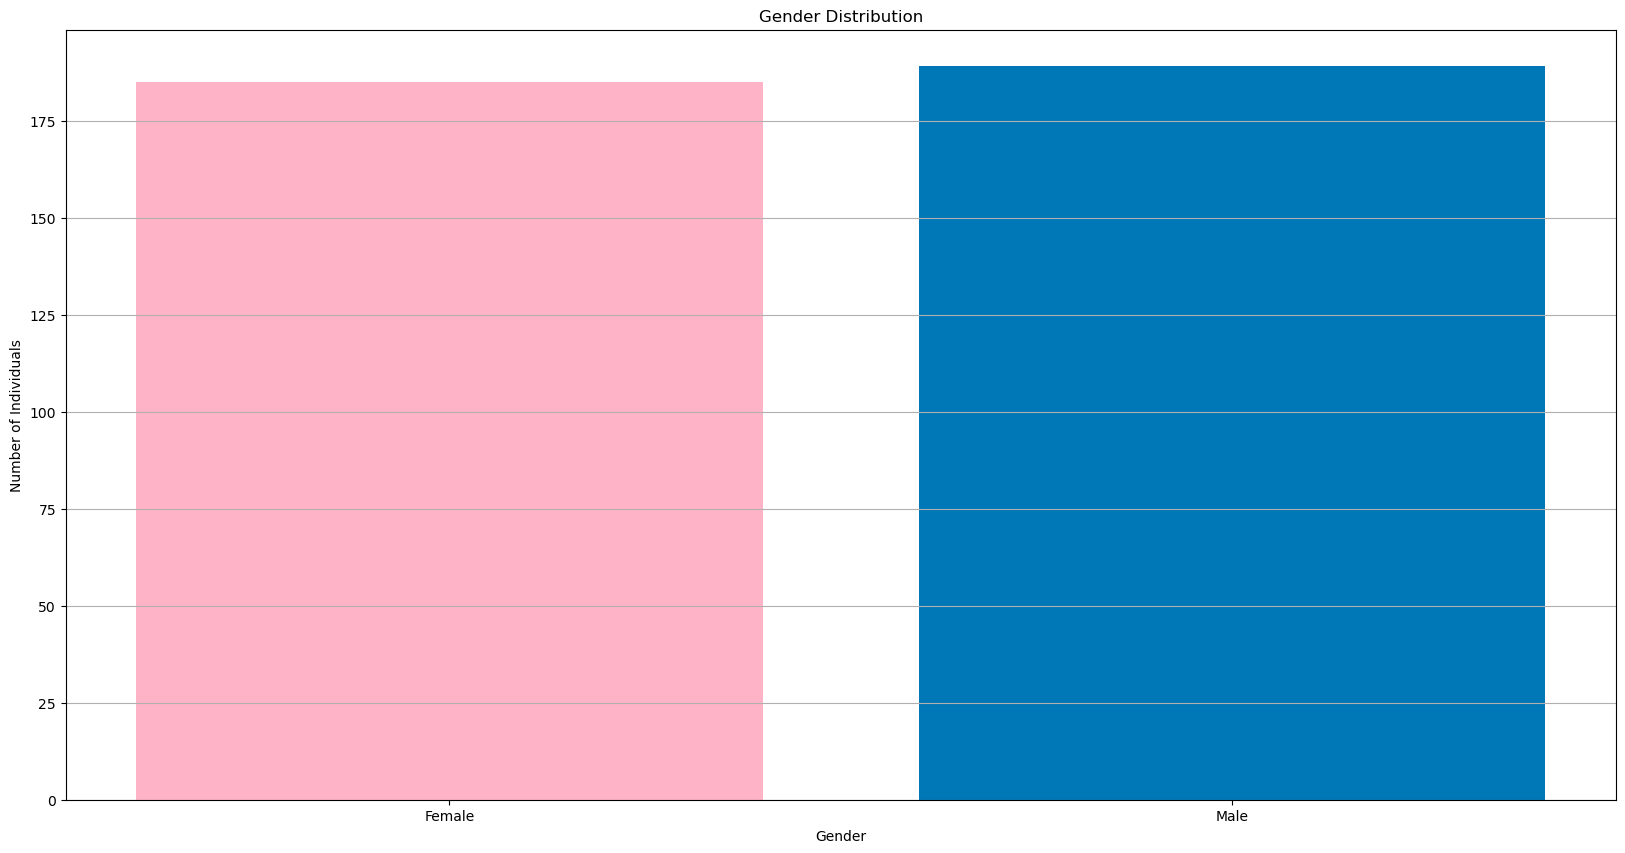

In [272]:

#Gender distibution using bar graph
colors = ['#ffb3c6', '#0077b6']
plt.figure(figsize=(20, 10))
plt.bar(gender_df['Gender'], gender_df['Count'], color=colors) #plot bar graph
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.grid(axis='y', alpha=1)
plt.show()

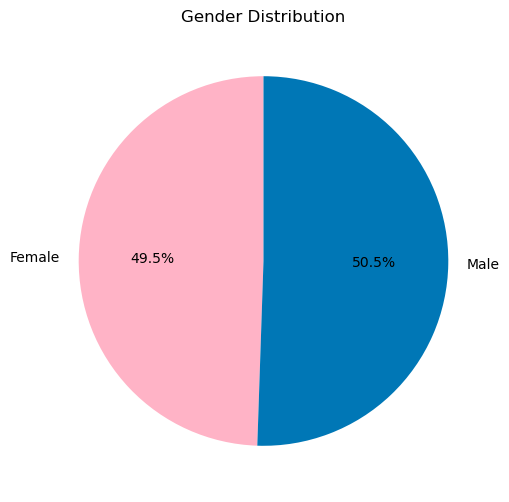

In [274]:
# Colors for the pie chart
colors = ['#ffb3c6', '#0077b6']

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(gender_df['Count'], labels=gender_df['Gender'], autopct='%1.1f%%', startangle=90, colors=colors)

# Add a title
plt.title('Gender Distribution')

# Display the plot
plt.show()

In [276]:
# Create age groups based on the age column

# Group by age group and gender, counting occurrences
age_gender_counts = df.groupby(['Age', 'Gender'], observed=False).size().unstack(fill_value=0)
age_gender_counts.head()

Gender,Female,Male
Age,,
27,0,1
28,0,5
29,2,11
30,2,11
31,1,17


<Figure size 1000x600 with 0 Axes>

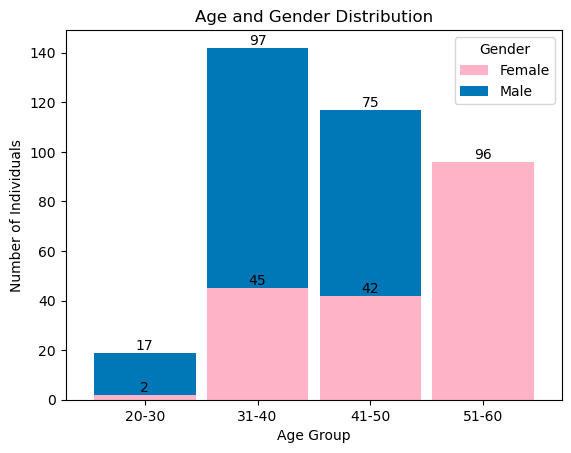

In [278]:
# Define the age bins (groups)
age_bins = [0, 20, 30, 40, 50, 60, 100]  # Define age groups
age_labels = ['0-20', '20-30', '31-40', '41-50', '51-60', '60+']

# Create a new 'Age Group' column based on the age bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by 'Age Group' and 'Gender' and get the counts
age_gender_counts = pd.crosstab(df['Age Group'], df['Gender'])

# Define colors for the gender
colors = ['#ffb3c6', '#0077b6']  # Example colors: pink for Female, blue for Male

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
ax = age_gender_counts.plot(kind='bar', stacked=True, color=colors, width=0.9)

# Add titles and labels
plt.title('Age and Gender Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add actual numbers on top of the bars
for i in range(len(age_gender_counts)):
    for j in range(len(age_gender_counts.columns)):
        count = age_gender_counts.iloc[i, j]
        if count > 0:  # Only annotate if count is greater than 0
            ax.annotate(str(count), 
                        (i, age_gender_counts.iloc[i, :j+1].sum()),  # Position it on top of the current stack
                        ha='center', va='bottom')


plt.show()

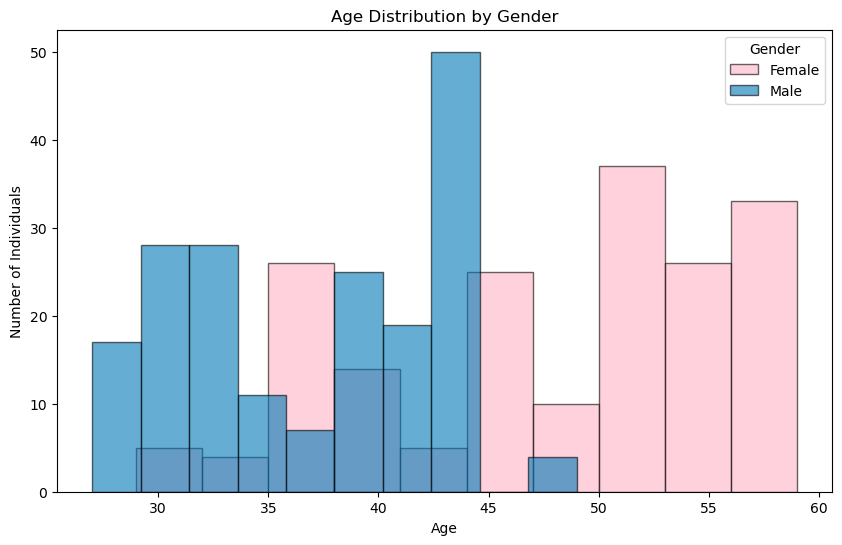

In [280]:
#Histogram
plt.figure(figsize=(10, 6))
# Separate the data by gender and plot
gender_colors = ['#ffb3c6', '#0077b6']  # Pink for Female, Blue for Male
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']

# Plot the histograms
plt.hist(df_female['Age'], bins=10, alpha=0.6, color=gender_colors[0], label='Female', edgecolor='black')
plt.hist(df_male['Age'], bins=10, alpha=0.6, color=gender_colors[1], label='Male', edgecolor='black')

# Add titles and labels
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.legend(title='Gender')

In [282]:
# Replace NaN values in 'Sleep Disorder' with 'No Disorder'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')



# Group by gender and count the number of sleep disorders
sleep_disorder_counts = df.groupby(['Gender', 'Sleep Disorder']).size().unstack(fill_value=0)
#Re-aligning columns
sleep_disorder_counts = sleep_disorder_counts.reindex(columns=['No Disorder','Insomnia','Sleep Apnea'])
#Display dataframe structure
sleep_disorder_counts.head()



Sleep Disorder,No Disorder,Insomnia,Sleep Apnea
Gender,,,
Female,82,36,67
Male,137,41,11


<Figure size 2000x1000 with 0 Axes>

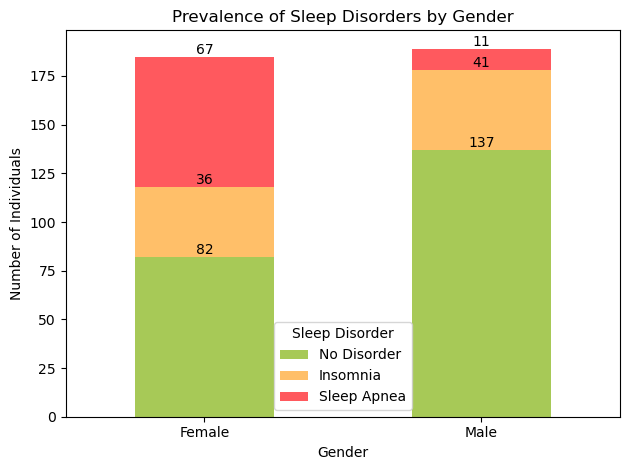

In [284]:
# Plot the visualization
plt.figure(figsize=(20, 10))
#Definition of custom colours
colours = ['#a7c957','#ffbf69','#ff595e'] #Colours are green, orange and red
ax = sleep_disorder_counts.plot(kind='bar', stacked=True, color=colours)
# Add titles and labels
plt.title('Prevalence of Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Sleep Disorder')

# Add actual numbers on top of the bars
for i in range(len(sleep_disorder_counts)):
    for j in range(len(sleep_disorder_counts.columns)):
        count = sleep_disorder_counts.iloc[i, j]
        if count > 0:  # Only annotate if count is greater than 0
            ax.annotate(str(count), 
                        (i, sleep_disorder_counts.iloc[i, :j+1].sum()),  # Position it on top of the current stack
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()

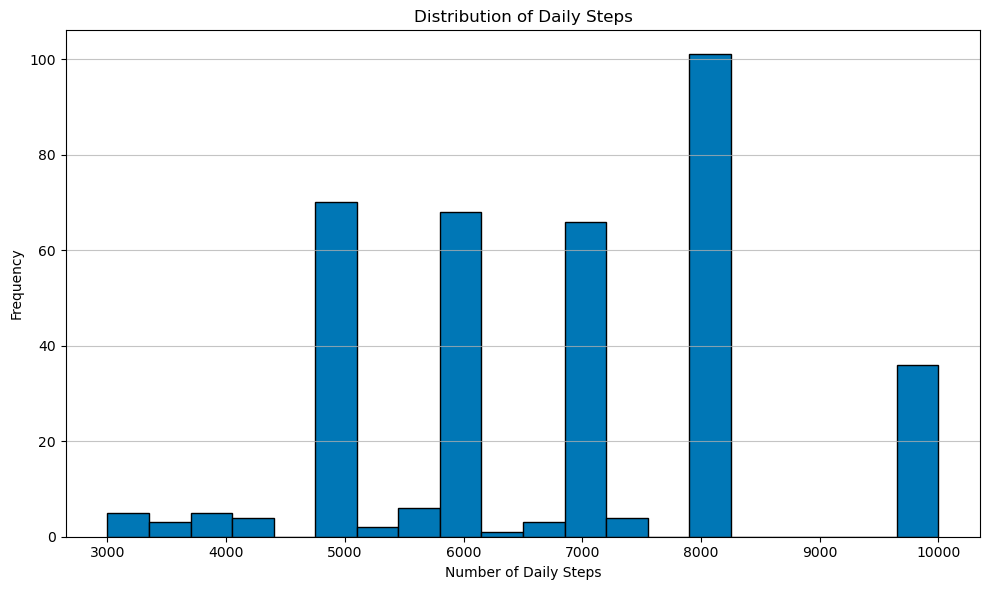

In [287]:
# Create a histogram for Physical Activity (Daily Steps)
plt.figure(figsize=(10, 6))
plt.hist(df['Daily Steps'], bins=20, color='#0077b6', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Daily Steps')
plt.xlabel('Number of Daily Steps')
plt.ylabel('Frequency')

# Show grid for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout()
plt.show()

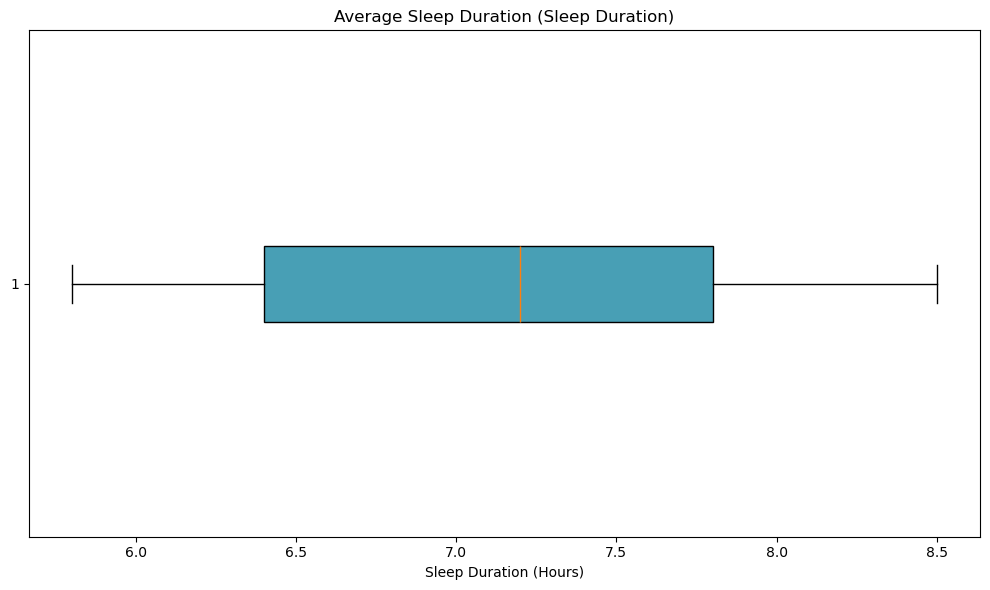

In [289]:
# 2. Physical Activity Distribution
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sleep Duration'], vert=False, patch_artist=True, boxprops=dict(facecolor='#489fb5', color='black'))

# Add titles and labels
plt.title('Average Sleep Duration (Sleep Duration)')
plt.xlabel('Sleep Duration (Hours)')

# Show the plot
plt.tight_layout()
plt.show()

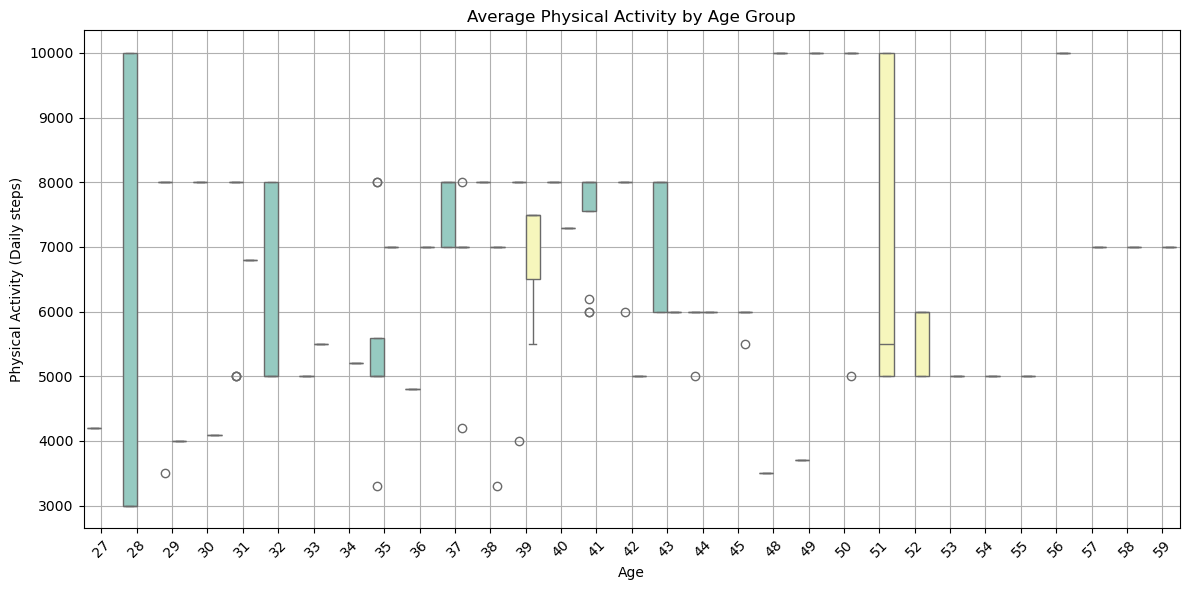

In [291]:
# Assuming you have a DataFrame `df` with 'Age Group' and 'Physical Activity' columns
# Create a box plot for physical activity by age group
plt.figure(figsize=(12, 6))
sb.boxplot(data=df, x='Age', y='Daily Steps', hue='Gender', palette='Set3', legend=False)

# Add titles and labels
plt.title('Average Physical Activity by Age Group')
plt.xlabel('Age')
plt.ylabel('Physical Activity (Daily steps)')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 10000x2000 with 0 Axes>

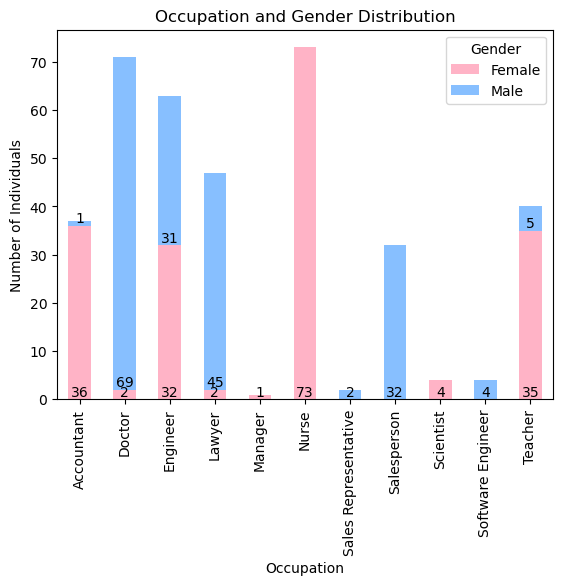

In [292]:
occupation_gender_counts = df.groupby(['Occupation', 'Gender'], observed=False).size().unstack(fill_value=0)

# Define colors for the gender
colours = ['#ffb3c6', '#87bfff']  # Example colors: pink for Female, blue for Male

# Plot stacked bar chart
plt.figure(figsize=(100, 20))
ax = occupation_gender_counts.plot(kind='bar', stacked=True, color=colours)
# Add titles and labels
plt.title('Occupation and Gender Distribution')
plt.xlabel('Occupation')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=90)
plt.legend(title='Gender')

# Add actual numbers on top of the bars
for i in range(len(occupation_gender_counts)):
    for j in range(len(occupation_gender_counts.columns)):
        count = occupation_gender_counts.iloc[i, j]
        if count > 0:  # Only annotate if count is greater than 0
            ax.annotate(str(count), 
                        (i, occupation_gender_counts.iloc[i, :j-0].sum()),  # Position it on top of the current stack
                        ha='center', va='bottom')
plt.show()

<Figure size 3000x2000 with 0 Axes>

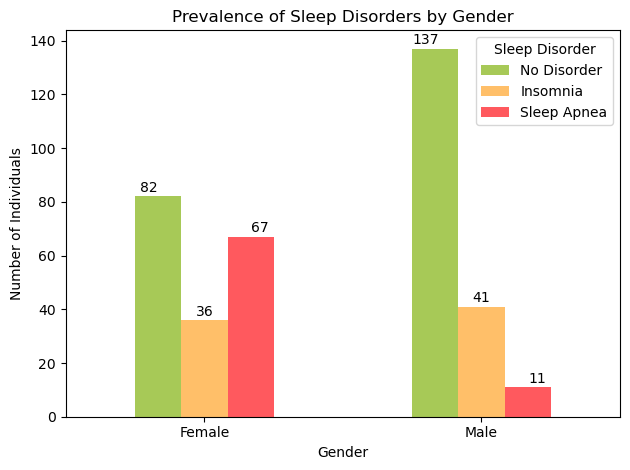

In [295]:
#Sleep Analysis

# Plot a grouped bar chart
plt.figure(figsize=(30, 20))
#Definition of custom colours
colours = ['#a7c957','#ffbf69','#ff595e'] #Colours are orange, green and red

sleep_disorder_counts.plot(kind='bar', color=colours)

plt.title('Prevalence of Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Sleep Disorder')

# Add actual numbers on top of the bars
bar_width = 0.2  # Adjust this based on the width of your bars
for i in range(len(sleep_disorder_counts)):
    for j in range(len(sleep_disorder_counts.columns)):
        count = sleep_disorder_counts.iloc[i, j]
        if count > 0:
            # Adjust the x position to center the annotation over the bar
            x_pos = i + (j - (len(sleep_disorder_counts.columns) - 1) / 2) * bar_width
            plt.annotate(str(count),
                         (x_pos, count + 0.5),  # Adjust vertical position
                         ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

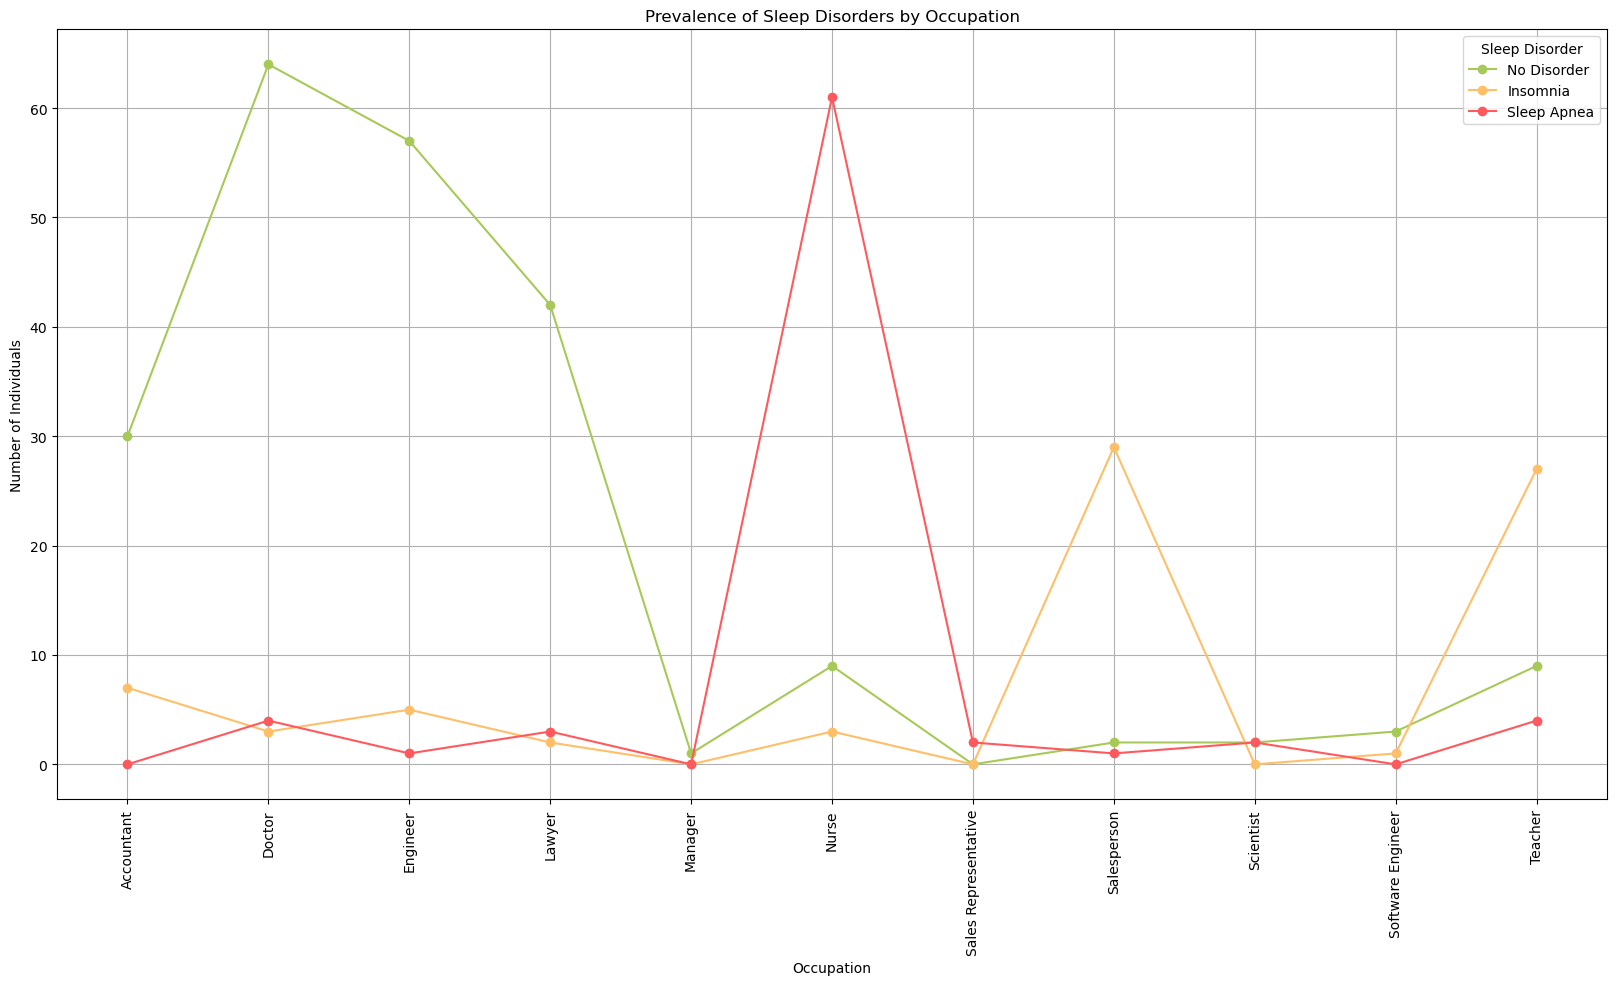

In [297]:
# Plot a Dot plot
sleep_disorder_counts = df.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)
#Re-aligning columns
sleep_disorder_counts = sleep_disorder_counts.reindex(columns=['No Disorder','Insomnia','Sleep Apnea'])
plt.figure(figsize=(20, 10))
#Definition of custom colours
colours = ['#a7c957','#ffbf69','#ff595e'] #Colours are green, orange and red

for i, disorder in enumerate(sleep_disorder_counts.columns):
    plt.plot(sleep_disorder_counts.index, sleep_disorder_counts[disorder], 
             marker='o', label=disorder, color=colours[i])

plt.title('Prevalence of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=90)
plt.legend(title='Sleep Disorder')
plt.grid()
plt.show()

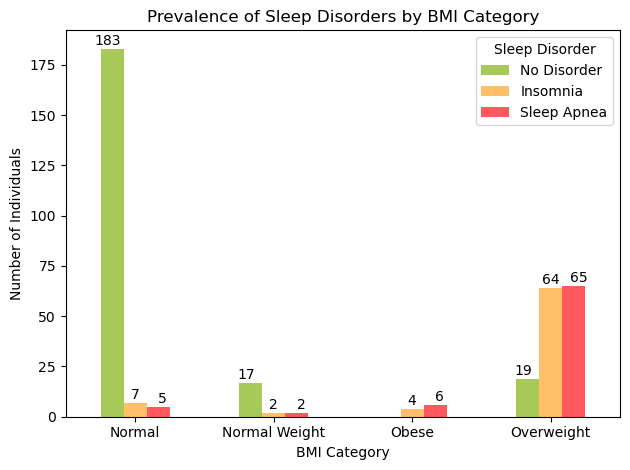

In [299]:
#Sleep disorder prevalence and BMI Category

# Plot a grouped bar chart
sleep_disorder_counts = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)
#Re-aligning columns
sleep_disorder_counts = sleep_disorder_counts.reindex(columns=['No Disorder','Insomnia','Sleep Apnea'])

#Definition of custom colours
colours = ['#a7c957','#ffbf69','#ff595e'] #Colours are orange, green and red

sleep_disorder_counts.plot(kind='bar', color=colours)

plt.title('Prevalence of Sleep Disorders by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Sleep Disorder')

# Add actual numbers on top of the bars
bar_width = 0.2  # Adjust this based on the width of your bars
for i in range(len(sleep_disorder_counts)):
    for j in range(len(sleep_disorder_counts.columns)):
        count = sleep_disorder_counts.iloc[i, j]
        if count > 0:
            # Adjust the x position to center the annotation over the bar
            x_pos = i + (j - (len(sleep_disorder_counts.columns) - 1) / 2) * bar_width
            plt.annotate(str(count),
                         (x_pos, count + 0.5),  # Adjust vertical position
                         ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

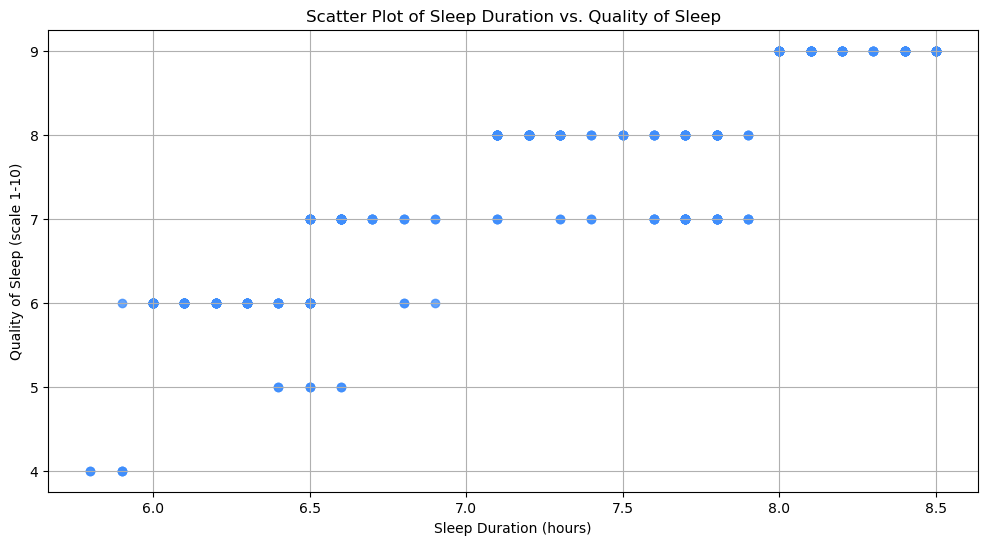

In [301]:
#sleep duration vs. quality of sleep

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Sleep Duration'], df['Quality of Sleep'], alpha=0.8, color='#3f8efc')

# Add titles and labels
plt.title('Scatter Plot of Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep (scale 1-10)')
plt.grid(True)

# Show the plot
plt.show()

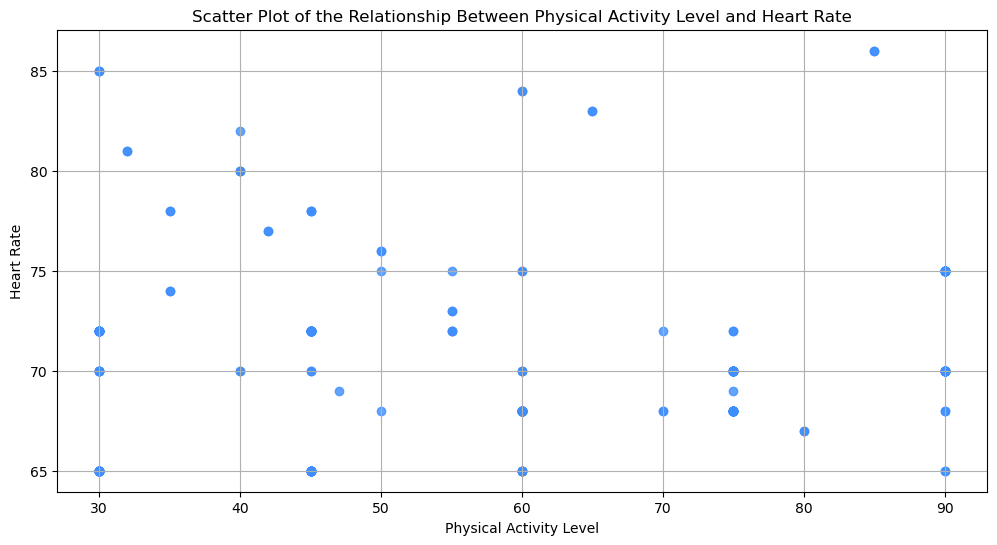

In [303]:
#relationship between physical activity level and heart rate

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Physical Activity Level'], df['Heart Rate'], alpha=0.8, color='#3f8efc')

# Add titles and labels
plt.title('Scatter Plot of the Relationship Between Physical Activity Level and Heart Rate')
plt.xlabel('Physical Activity Level')
plt.ylabel('Heart Rate')
plt.grid(True)

# Show the plot
plt.show()

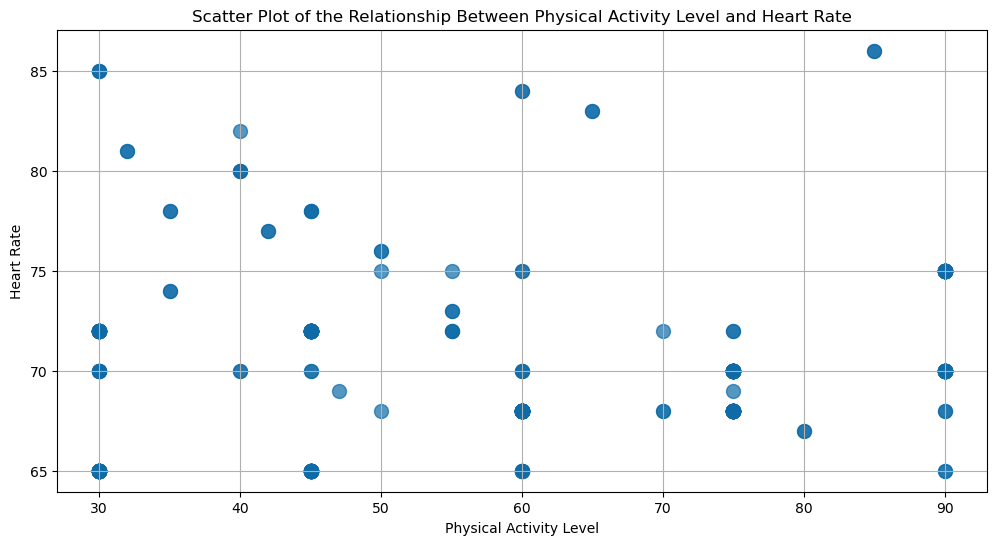

In [305]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Physical Activity Level'], df['Heart Rate'], 
            alpha=0.7, color='#0e6ba8', s=100)  # 's' adjusts the size of the points

# Add titles and labels
plt.title('Scatter Plot of the Relationship Between Physical Activity Level and Heart Rate')
plt.xlabel('Physical Activity Level')
plt.ylabel('Heart Rate')
plt.grid(True)

# Show the plot
plt.show()

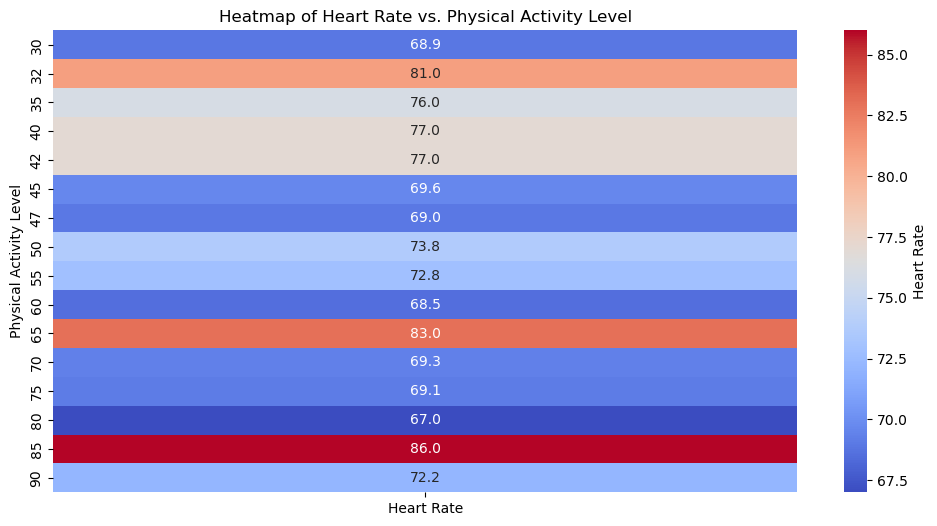

In [307]:

# Heat Map
sample = df[['Physical Activity Level','Heart Rate']]

# Create a pivot table to prepare data for the heatmap
heatmap_data_pivot = sample.pivot_table(values='Heart Rate', 
                                               index='Physical Activity Level', 
                                               aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sb.heatmap(heatmap_data_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Heart Rate'})

# Add titles and labels
plt.title('Heatmap of Heart Rate vs. Physical Activity Level')

plt.ylabel('Physical Activity Level')

# Show the plot
plt.show()

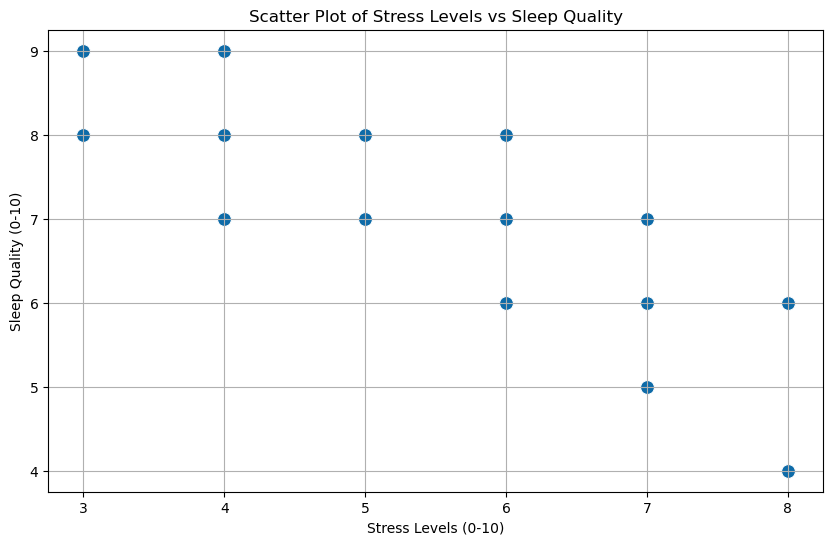

In [309]:
# Stress and Sleep

# Create a DataFrame
sample = df[['Stress Level','Quality of Sleep']]
# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Stress Level', y='Quality of Sleep', data=sample, color='#0e6ba8', s=100)
plt.title('Scatter Plot of Stress Levels vs Sleep Quality')
plt.xlabel('Stress Levels (0-10)')
plt.ylabel('Sleep Quality (0-10)')
plt.grid(True)
plt.show()




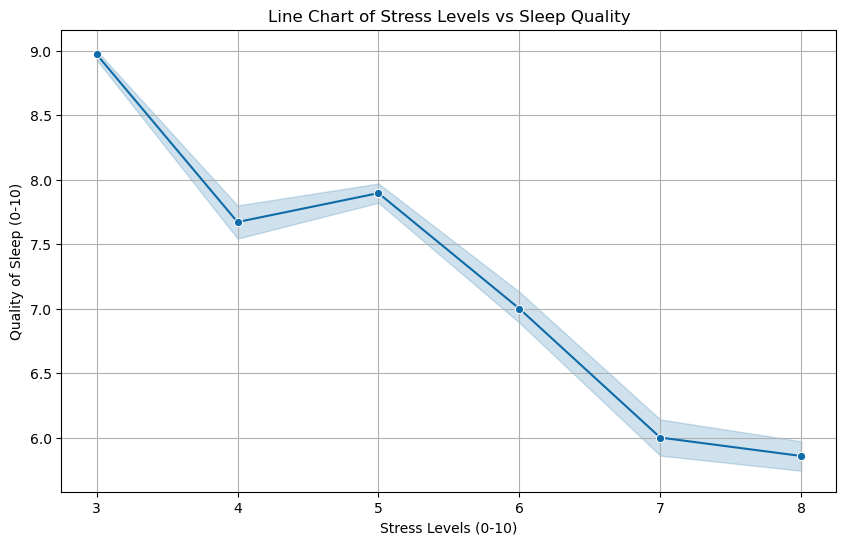

In [311]:
sample = df[['Stress Level', 'Quality of Sleep']]
# Create a line plot
plt.figure(figsize=(10, 6))
sb.lineplot(x='Stress Level', y='Quality of Sleep', data=sample, color='#0e6ba8', marker='o')

# Add titles and labels
plt.title('Line Chart of Stress Levels vs Sleep Quality')
plt.xlabel('Stress Levels (0-10)')
plt.ylabel('Quality of Sleep (0-10)')

# Display the grid
plt.grid(True)

# Show the plot
plt.show()


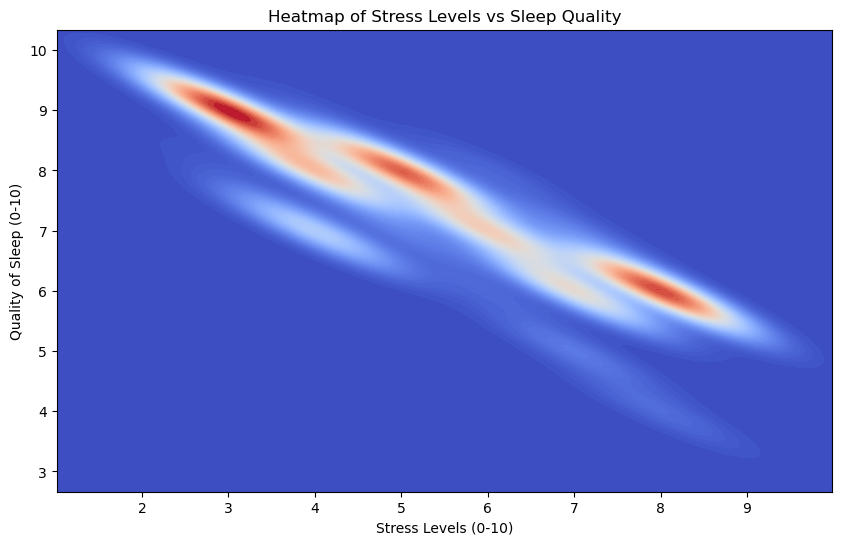

In [313]:
# Assuming 'df' is your DataFrame with 'Stress Level' and 'Quality of Sleep' columns
sample = df[['Stress Level', 'Quality of Sleep']]

# Create a 2D heatmap (kernel density estimate plot)
plt.figure(figsize=(10, 6))
sb.kdeplot(x='Stress Level', y='Quality of Sleep', data=sample, cmap='coolwarm', fill=True, thresh=0, levels=100)

# Set plot titles and labels
plt.title('Heatmap of Stress Levels vs Sleep Quality')
plt.xlabel('Stress Levels (0-10)')
plt.ylabel('Quality of Sleep (0-10)')

# Display the plot
plt.show()

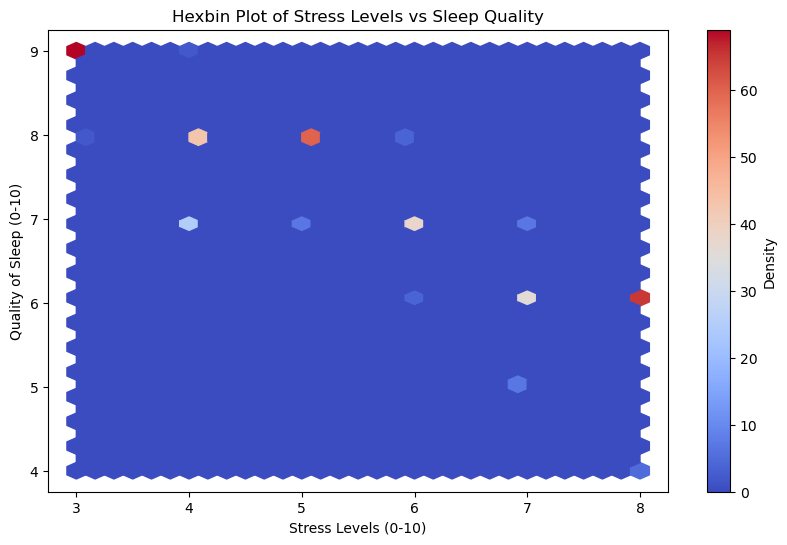

In [314]:
# Assuming 'df' is your DataFrame with 'Stress Level' and 'Quality of Sleep' columns
sample = df[['Stress Level', 'Quality of Sleep']]

# Create a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(x=sample['Stress Level'], y=sample['Quality of Sleep'], gridsize=30, cmap='coolwarm')

# Add a colorbar to show the density scale
plt.colorbar(label='Density')

# Set plot titles and labels
plt.title('Hexbin Plot of Stress Levels vs Sleep Quality')
plt.xlabel('Stress Levels (0-10)')
plt.ylabel('Quality of Sleep (0-10)')

# Display the plot
plt.show()

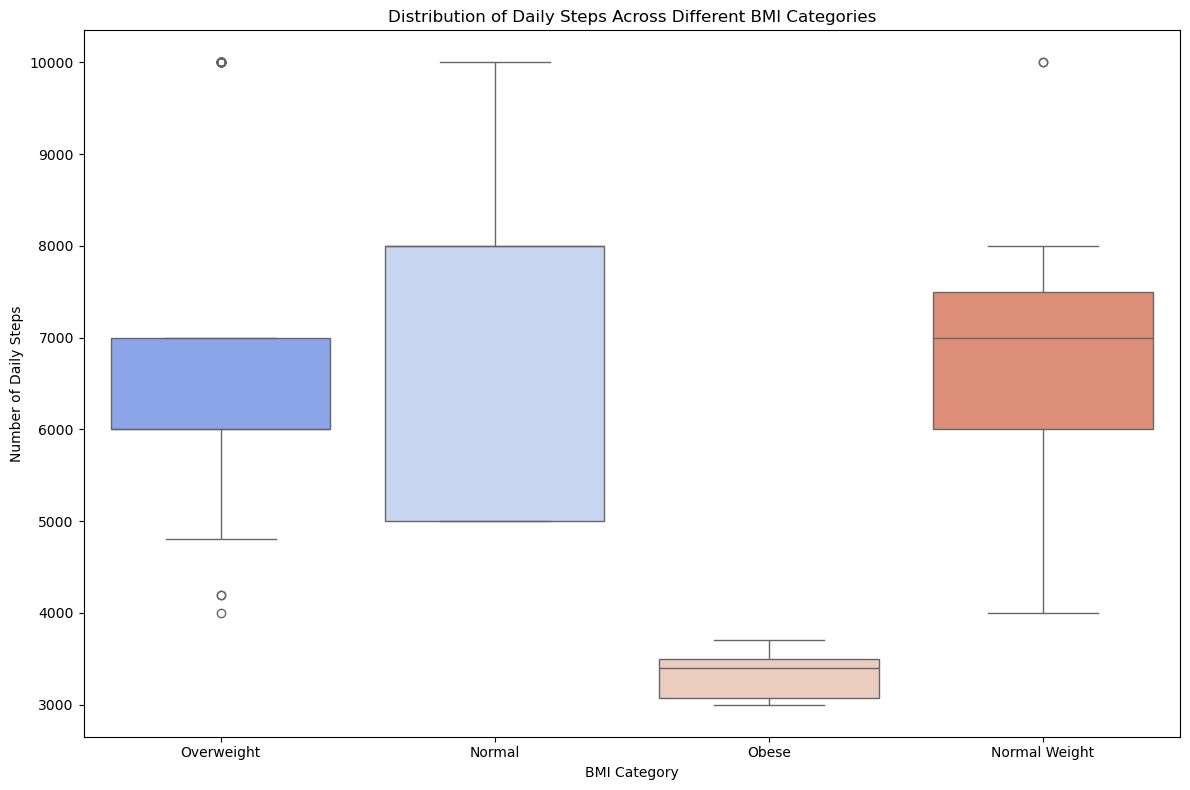

In [317]:
# 2. Physical Activity Distribution
plt.figure(figsize=(12, 8))

sb.boxplot(x='BMI Category', y='Daily Steps',  data=df, hue='BMI Category', palette="coolwarm")

# Add titles and labels
plt.title('Distribution of Daily Steps Across Different BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Number of Daily Steps')

# Show the plot
plt.tight_layout()
plt.show()

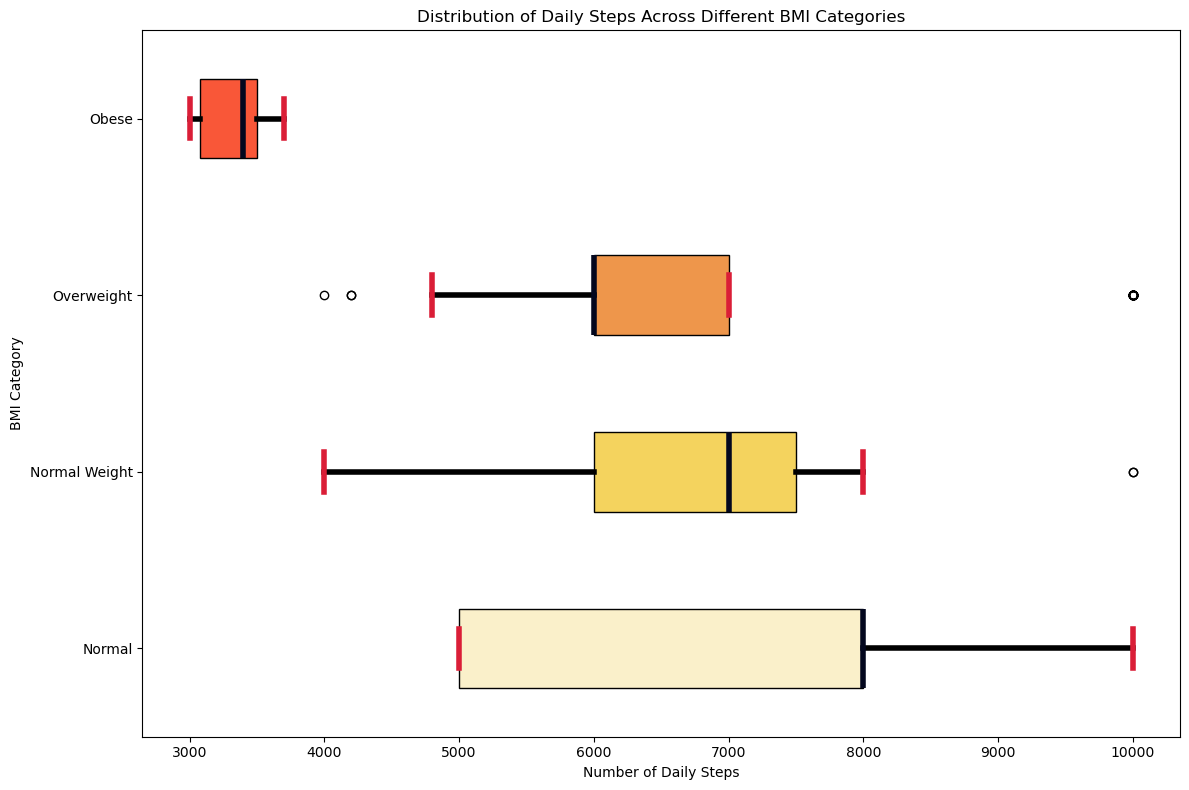

In [318]:
# Group the data by BMI Category
groups = df.groupby('BMI Category')['Daily Steps']

#Re-aligning categories
bmi_order= ['Normal','Normal Weight','Overweight','Obese']

# Group the data by BMI Category based on the custom order
groups = df.groupby('BMI Category')['Daily Steps']

# Prepare the data for the boxplot (only include categories in the specified order)
data_to_plot = [groups.get_group(bmi_category) for bmi_category in bmi_order]

# Create the boxplot using Matplotlib
plt.figure(figsize=(12, 8))
boxplot = plt.boxplot(data_to_plot, vert=False, patch_artist=True)

# Add titles and labels
plt.title('Distribution of Daily Steps Across Different BMI Categories')
plt.xlabel('Number of Daily Steps')
plt.ylabel('BMI Category')

# Set the y-ticks to correspond to the BMI categories in the specified order
plt.yticks(ticks=range(1, len(bmi_order) + 1), labels=bmi_order)

# Customize the colors of the boxes
colors = ['#faf0ca', '#f4d35e', '#ee964b','#f95738']  # Customize your color list
for i, box in enumerate(boxplot['boxes']):
    box.set_facecolor(colors[i % len(colors)])  # Assign a color to each box

# Customize other parts of the boxplot (whiskers, medians, etc.)
for whisker in boxplot['whiskers']:
    whisker.set(color='black', linewidth=4)  # Whiskers in black

for cap in boxplot['caps']:
    cap.set(color='#da1e37', linewidth=4)  # Caps in black

for median in boxplot['medians']:
    median.set(color='#03071e', linewidth=4)  # Median in red

for flier in boxplot['fliers']:
    flier.set(marker='o', color='#dd2d4a', alpha=1)  # Outliers in green

# Show the plot
plt.tight_layout()
plt.show()